### Titanic 데이터 EDA 수행.

In [0]:
#spark.read.csv() 메소드를 이용하여 csv 파일을 로드하고 DataFrame으로 변환. 
# pandas_df = pd.read_csv('/FileStore/tables/titanic_train.csv', header='infer')
titanic_sdf = spark.read.csv('/FileStore/tables/titanic_train.csv', header=True, inferSchema=True)

# pandas DataFrame을 spark DataFrame으로 부터 생성. 
titanic_pdf = titanic_sdf.select('*').toPandas()

display(titanic_sdf.limit(10))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [0]:
titanic_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


In [0]:
# titanic_sdf 의 schema 확인
titanic_sdf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [0]:
# 컬럼별로 Null 인 경우만 count하는 select 로직.
import pyspark.sql.functions as F

titanic_sdf.select([F.count(F.when(F.col(c).isNull()|F.isnan(c), c)).alias(c) for c in titanic_sdf.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [0]:
display(titanic_sdf.describe())

summary,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714,891,891,891,891,204,889
mean,446.0,0.3838383838383838,2.308641975308642,null,null,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,null,null
stddev,257.3538420152301,0.48659245426485753,0.8360712409770491,null,null,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,null,null
min,1,0,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0.0,A10,C
max,891,1,3,"van Melkebeke, Mr. Philemon",male,80.0,8,6,WE/P 5735,512.3292,T,S


In [0]:
print("#### Survived value count #### ")
print(titanic_sdf.groupBy('Survived').count().show())
print("#### Pclass value count #####")
print(titanic_sdf.groupBy('Pclass').count().show())

#### Survived value count #### 
+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+

None
#### Pclass value count #####
+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+

None


In [0]:
groupby_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for groupby_col in groupby_cols:
    print('##### ' + groupby_col + ' value counts ######')
    titanic_sdf.groupBy(groupby_col).count().show()

##### Survived value counts ######
+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+

##### Pclass value counts ######
+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+

##### Sex value counts ######
+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+

##### Ticket value counts ######
+----------------+-----+
|          Ticket|count|
+----------------+-----+
|          367230|    2|
|       P/PP 3381|    2|
|          244270|    1|
|          363291|    3|
|SOTON/OQ 3101317|    1|
|           31418|    1|
|           26360|    2|
|            2700|    1|
|           14313|    1|
|          345763|    1|
|       A/5 21172|    1|
|          364500|    1|
|           19877|    2|
|          350029|    1|
|          113800|    1|
|      A/4. 39886|    1|
|       C.A. 2673|    2|
|          113807|    1|
|        PC 17604|    2|
|       C.A. 2315| 

### SQL과 Databricks 내장 그래프 기능을 활용한 EDA
* Spark DataFrame은 matplotlib 등의 파이썬 시각화 라이브러리와 바로 연동할 수 없음. 
* Databricks 노트북은 내장된 그래프 기능을 통해 SQL(또는 display()함수로 감싸진 DataFrame) 수행 결과를 다양한 그래프로 시각화 할 수 있음. 
* Spark DataFrame을 pandas API on spark(Spark 3.2 이상)을 이용할 경우 파이썬 시각화 라이브러리와 연동 할 수 있음.

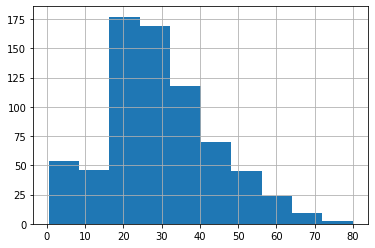

In [0]:
import matplotlib.pyplot as plt

titanic_pdf['Age'].hist() # titanic_sdf.select('Age').hist()는 동작하지 않음. 
plt.show()

In [0]:
# Pandas API on Spark 적용
import pyspark.pandas as ps

# spark DataFrame에서 Spark pandas DataFrame으로 변경. 
psdf = titanic_sdf.to_pandas_on_spark() # pandas DataFrame으로 부터 변경할 경우는 psdf = ps.from_pandas(titanic_pdf) 
print(type(psdf))

psdf['Age'].hist()

<class 'pyspark.pandas.frame.DataFrame'>


In [0]:
# SQL 사용을 위해서 Spark DataFrame을 View형태로 변환
titanic_sdf.createOrReplaceTempView('titanic_view')

In [0]:
%sql
select survived, count(*) as cnt from titanic_view group by survived order by 2 desc

survived,cnt
0,549
1,342


In [0]:
%sql
select cabin, count(*) as cnt from titanic_view group by cabin order by 2 desc

cabin,cnt
null,687
C23 C25 C27,4
G6,4
B96 B98,4
F2,3
E101,3
C22 C26,3
D,3
F33,3
C123,2


In [0]:
%sql
select case when cabin is null then 'NA' else cabin end as cabin from titanic_view

cabin
NA
C85
NA
C123
NA
NA
E46
NA
NA
NA


SQL로 Histogram을 구하고 이를 시각화

In [0]:
%sql
select age_bin, count(*)  cnt
from (
  select floor(age/10.0)*10 as age_bin from titanic_view
) group by age_bin order by 2 desc;


age_bin,cnt
20,220
null,177
30,167
10,102
40,89
0,62
50,48
60,19
70,6
80,1


In [0]:
%sql
/*
select age, floor(age/10.0)*10 as age_bin from titanic_view;

select age_bin, count(*)  cnt
from (
  select floor(age/10.0)*10 as age_bin from titanic_view
) group by age_bin order by 2 desc;


select age_bin, age_bin||'-'||(age_bin+10) as age_bin_range, count(*)  cnt
from (
  select floor(age/10.0)*10 as age_bin from titanic_view
) group by age_bin order by 3 desc;

select age_bin||'-'||(age_bin+10) as age_bin_range, cnt
from (
  select floor(age/10.0)*10 as age_bin, count(*) cnt
  from titanic_view group by 1
) order by cnt desc
*/

In [0]:
%sql
select age_bin||'-'||(age_bin+10) as age_bin_range, cnt
from (
  select floor(age/10.0)*10 as age_bin, count(*) cnt
  from titanic_view group by 1
) order by cnt desc

age_bin_range,cnt
null,177
20-25,114
25-30,106
30-35,95
15-20,86
35-40,72
40-45,48
45-50,41
0-5,40
50-55,32


In [0]:
%sql
select fare_bin||'-'||(fare_bin+10) as fare_bin_range, cnt
from (
  select floor(fare/10.0)*10 as fare_bin, count(*) cnt
  from titanic_view group by 1
) order by cnt desc

fare_bin_range,cnt
0-10,336
10-20,179
20-30,136
30-40,64
50-60,39
70-80,29
60-70,17
80-90,15
40-50,15
90-100,8


In [0]:
titanic_sdf.groupBy('Survived', 'Sex').count().show()

+--------+------+-----+
|Survived|   Sex|count|
+--------+------+-----+
|       0|female|   81|
|       1|  male|  109|
|       1|female|  233|
|       0|  male|  468|
+--------+------+-----+



In [0]:
%sql

select survived, sex, count(*) from titanic_view group by survived, sex

survived,sex,count(1)
0,female,81
1,male,109
1,female,233
0,male,468


In [0]:
%sql
select pclass, sex, survived, count(*) cnt from titanic_view group by pclass, sex, survived order by 1, 2, 3

pclass,sex,survived,cnt
1,female,0,3
1,female,1,91
1,male,0,77
1,male,1,45
2,female,0,6
2,female,1,70
2,male,0,91
2,male,1,17
3,female,0,72
3,female,1,72


In [0]:
%sql

select pclass, sex, 
count(case when survived = 0 then 1 else Null end) cnt_non_survived,
count(case when survived = 1 then 1 else Null end) cnt_survived from titanic_view group by pclass, sex order by 1, 2
/*
select pclass, sex, 
sum(case when survived = 0 then 1 else 0 end) cnt_non_survived,
sum(case when survived = 1 then 1 else 0 end) cnt_survived from titanic_view group by pclass, sex order by 1, 2
*/

pclass,sex,cnt_non_survived,cnt_survived
1,female,3,91
1,male,77,45
2,female,6,70
2,male,91,17
3,female,72,72
3,male,300,47


In [0]:
# 일반 python용 UDF를 작성. 반드시 입력 값과 반환 값을 설정
def get_category(age):
    cat = ''
    
    # age 값이 None일 경우는 NA를 Return
    if age == None:
        return 'NA'
    
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

# 일반 python용 UDF를 pyspark용 UDF로 변환. udf(lambda 입력변수: 일반 UDF, 해당 일반 UDF의 반환형)
udf_get_category = udf(lambda x:get_category(x), StringType() )
# udf_get_category()에 Age 컬럼값을 입력하여 반환되는 값으로 새로운 컬럼 Age_Category를 생성

titanic_sdf = titanic_sdf.withColumn("Age_Category",udf_get_category(col("Age")))
titanic_sdf.show()

'''
#아래와 같이 when otherwise 를 이용해서도 변환 가능. 
from pyspark.sql.functions import when
                   
titanic_sdf_filled_02 = titanic_sdf.withColumn('Age_category', when(F.col('Age') <= 5, 'Baby')
                                                                      .when(F.col('Age') <= 12, 'Child')
                                                                      .when(F.col('Age') <= 18, 'Teenage')
                                                                      .when(F.col('Age') <= 25, 'Student')
                                                                      .when(F.col('Age') <= 35, 'Young Adult')
                                                                      .when(F.col('Age') <= 60, 'Adult')
                                                                      .when(F.col('Age').isNull(), 'NA')
                                                                      .otherwise('Elderly'))
'''

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

In [0]:
%sql
-- 새로운 컬럼을 추가시 View에 자동 반영되지 않음. 
select * from titanic_view

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C


In [0]:
titanic_sdf.createOrReplaceTempView('titanic_view')

In [0]:
%sql
select * from titanic_view

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S,Young Adult
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q,NA
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S,Baby
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S,Young Adult
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C,Teenager


In [0]:
%sql
select age_category, survived, sex, count(*) cnt from titanic_view group by  age_category, survived, sex order by cnt desc

age_category,survived,sex,cnt
NA,0,male,108
Adult,0,male,101
Young Adult,0,male,100
Student,0,male,95
Adult,1,female,54
Young Adult,1,female,53
Student,1,female,41
NA,1,female,36
Teenager,0,male,31
Young Adult,1,male,30


### 결손 데이터 처리, 컬럼 가공, 인코딩 수행.

In [0]:
import pyspark.sql.functions as F

avg_age = titanic_sdf.select(F.avg(F.col('Age')))
avg_age_row = avg_age.first() # avg_age.head()와 동일. 
avg_age_value = avg_age.first()[0]

print(avg_age, avg_age_row, avg_age_value)
print(avg_age.show())

DataFrame[avg(Age): double] Row(avg(Age)=29.69911764705882) 29.69911764705882
+-----------------+
|         avg(Age)|
+-----------------+
|29.69911764705882|
+-----------------+

None


In [0]:
titanic_sdf = titanic_sdf.fillna({'Age':titanic_sdf.select(F.avg(F.col('Age'))).first()[0],
                   'Cabin': 'N',
                   'Embarked': 'N'
                   })
display(titanic_sdf.limit(20))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,N,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,N,S,Young Adult
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,NA
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,N,S,Baby
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S,Young Adult
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C,Teenager


In [0]:
# age의 Null값을 평균으로 대체했으므로 Age_Category 컬럼도 재 생성
titanic_sdf = titanic_sdf.withColumn("Age_Category",udf_get_category(col("Age")))

# DataFrame에서도 display()로 감쌀 경우 databricks의 내장 그래프 기능을 사용할 수 있음. 
display(titanic_sdf.groupBy('age_category', 'survived', 'sex').count())


age_category,survived,sex,count
Elderly,1,female,3
Student,1,female,41
Teenager,0,male,31
Teenager,0,female,9
Student,1,male,13
Baby,0,female,5
Child,0,female,8
Student,0,female,13
Young Adult,0,female,30
Elderly,0,male,17


In [0]:
# Cabin 컬럼은 맨 앞자리 문자로 대체. 컬럼 update시에 withColumn() 메소드 적용. 
titanic_sdf = titanic_sdf.withColumn('Cabin', F.substring(F.col('Cabin'), 0, 1))
display(titanic_sdf.limit(10))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,N,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,N,S,Young Adult
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,Young Adult
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,N,S,Baby
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S,Young Adult
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C,Teenager


In [0]:
def fill_n_transform_columns(titanic_sdf):
    titanic_sdf = titanic_sdf.fillna({'Age':titanic_sdf.select(F.avg(F.col('Age'))).first()[0],
                                      'Cabin': 'N',
                                      'Embarked':'N' 
                                     })

    titanic_sdf = titanic_sdf.withColumn("Age_Category",udf_get_category(col("Age")))
    titanic_sdf = titanic_sdf.withColumn('Cabin', F.substring(F.col('Cabin'), 0, 1))
    
    return titanic_sdf

titanic_sdf = fill_n_transform_columns(titanic_sdf)
display(titanic_sdf.limit(10))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,N,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,N,S,Young Adult
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,Young Adult
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,N,S,Baby
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S,Young Adult
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C,Teenager


In [0]:
# null 값이 있는지 재 확인. 
titanic_sdf.select([F.count(F.when(F.col(c).isNull()|F.isnan(c), c)).alias(c) for c in titanic_sdf.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|    0|       0|           0|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+



In [0]:
# 특정 컬럼들을 삭제하기. VectorAssembler 로 변환된 feature vector만 학습/예측에 참여하므로 여기서 삭제하지 않고 나중에 feature vectorization 때 제외해도 무방. 
def drop_columns(sdf, drop_cols=None):
    # drop_cols는 인자로 list가 입력되나 Spark DataFrame의 drop() 메소드는 인자로 컬럼명 문자열을 입력 받음. 
    sdf = sdf.drop(*drop_cols)
    return sdf

titanic_sdf = drop_columns(titanic_sdf, drop_cols=['PassengerId', 'Name', 'Ticket'])

display(titanic_sdf.limit(10))

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Category
0,3,male,22.0,1,0,7.25,N,S,Student
1,1,female,38.0,1,0,71.2833,C,C,Adult
1,3,female,26.0,0,0,7.925,N,S,Young Adult
1,1,female,35.0,1,0,53.1,C,S,Young Adult
0,3,male,35.0,0,0,8.05,N,S,Young Adult
0,3,male,29.69911764705882,0,0,8.4583,N,Q,Young Adult
0,1,male,54.0,0,0,51.8625,E,S,Adult
0,3,male,2.0,3,1,21.075,N,S,Baby
1,3,female,27.0,0,2,11.1333,N,S,Young Adult
1,2,female,14.0,1,0,30.0708,N,C,Teenager


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

def label_encode_columns(sdf, input_cols=None):
    
    output_cols = [ 'label_'+col for col in input_cols]
    string_indexer = StringIndexer(inputCols=input_cols, outputCols=output_cols)
    sdf = string_indexer.fit(sdf).transform(sdf)
    
    return sdf

def onehot_encode_columns(sdf, input_cols=None):
    
    label_cols = ['label_'+col for col in input_cols]
            
    string_indexer = StringIndexer(inputCols=input_cols, outputCols=label_cols)
    sdf = string_indexer.fit(sdf).transform(sdf)
    # sdf = label_encode_columns(sdf, input_cols)
    
    output_cols = ['onehot_'+col for col in input_cols]
    onehot_encoder = OneHotEncoder(inputCols=label_cols, outputCols=output_cols)
    sdf = onehot_encoder.fit(sdf).transform(sdf)
    # one hot encoding 하기 위해 생성한 label encoding된 컬럼을 삭제
    sdf = sdf.drop(*label_cols)
    
    return sdf

In [0]:
titanic_sdf_enc_01 = label_encode_columns(titanic_sdf.select('*'), input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'])
titanic_sdf_enc_01.show()

+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+------------------+-----------+---------+--------------+
|Survived|Pclass|   Sex|              Age|SibSp|Parch|   Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|
+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+------------------+-----------+---------+--------------+
|       0|     3|  male|             22.0|    1|    0|   7.25|    N|       S|     Student|               2.0|        0.0|      0.0|           0.0|
|       1|     1|female|             38.0|    1|    0|71.2833|    C|       C|       Adult|               1.0|        1.0|      1.0|           1.0|
|       1|     3|female|             26.0|    0|    0|  7.925|    N|       S| Young Adult|               0.0|        0.0|      1.0|           0.0|
|       1|     1|female|             35.0|    1|    0|   53.1|    C|       S| Young Adult|               0.0|        1

In [0]:
titanic_sdf_enc_01 = onehot_encode_columns(titanic_sdf.select('*'), input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'])
display(titanic_sdf_enc_01)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Category,onehot_Age_Category,onehot_Cabin,onehot_Sex,onehot_Embarked
0,3,male,22.0,1,0,7.25,N,S,Student,"Map(vectorType -> sparse, length -> 6, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,1,female,38.0,1,0,71.2833,C,C,Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0))"
1,3,female,26.0,0,0,7.925,N,S,Young Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,1,female,35.0,1,0,53.1,C,S,Young Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,35.0,0,0,8.05,N,S,Young Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,29.69911764705882,0,0,8.4583,N,Q,Young Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(2), values -> List(1.0))"
0,1,male,54.0,0,0,51.8625,E,S,Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,2.0,3,1,21.075,N,S,Baby,"Map(vectorType -> sparse, length -> 6, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,3,female,27.0,0,2,11.1333,N,S,Young Adult,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,2,female,14.0,1,0,30.0708,N,C,Teenager,"Map(vectorType -> sparse, length -> 6, indices -> List(3), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0))"


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Pipeline을 이용한 Encoding 함수. 
def encode_columns(sdf, input_cols=None, encode_gubun='label'):
    # label encoding과 one hot encoding 변환 컬럼명 지정. 
    label_cols = ['label_'+col for col in input_cols]
    onehot_cols = ['onehot_'+col for col in input_cols]
    
    #pipeline의 stages로 지정된 StringIndexer와 OneHotEncoder 객체 생성. 
    label_encoder_stage = StringIndexer(inputCols=input_cols, outputCols=label_cols)
    onehot_encoder_stage = OneHotEncoder(inputCols=label_cols, outputCols=onehot_cols)
    
    # encode_gubun이 label이면 StringIndexer stage만 등록, onehot이면 StringIndexer, OneHotEncoder 모두 등록. 
    stages = []
    if encode_gubun == 'label':
        stages = [label_encoder_stage]
    else:
        stages = [label_encoder_stage, onehot_encoder_stage]
        
    pipeline = Pipeline(stages=stages)
    sdf = pipeline.fit(sdf).transform(sdf)
    
    return sdf
  
titanic_sdf_encode_02 = encode_columns(titanic_sdf.select('*'), input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'], encode_gubun='onehot')
display(titanic_sdf_encode_02.limit(10))

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Category,label_Age_Category,label_Cabin,label_Sex,label_Embarked,onehot_Age_Category,onehot_Cabin,onehot_Sex,onehot_Embarked
0,3,male,22.0,1,0,7.25,N,S,Student,2.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,1,female,38.0,1,0,71.2833,C,C,Adult,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0))"
1,3,female,26.0,0,0,7.925,N,S,Young Adult,0.0,0.0,1.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,1,female,35.0,1,0,53.1,C,S,Young Adult,0.0,1.0,1.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,35.0,0,0,8.05,N,S,Young Adult,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,29.69911764705882,0,0,8.4583,N,Q,Young Adult,0.0,0.0,0.0,2.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(2), values -> List(1.0))"
0,1,male,54.0,0,0,51.8625,E,S,Adult,1.0,4.0,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
0,3,male,2.0,3,1,21.075,N,S,Baby,4.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,3,female,27.0,0,2,11.1333,N,S,Young Adult,0.0,0.0,1.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))"
1,2,female,14.0,1,0,30.0708,N,C,Teenager,3.0,0.0,1.0,1.0,"Map(vectorType -> sparse, length -> 6, indices -> List(3), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List

### 학습, 예측, 평가 수행. 
* 데이터 재로딩 및 사전 데이터 재 가공 수행. 
* feature vectorization 적용 후 학습과 테스트 데이터 세트로 분할하여 학습, 예측, 성능 평가 수행.

In [0]:
# titanic 데이터 세트를 다시 spark DataFrame으로 재로딩하고 데이터 사전 가공, Encoding 작업 진행. 
titanic_sdf = spark.read.csv('/FileStore/tables/titanic_train.csv', header=True, inferSchema=True)

titanic_sdf = fill_n_transform_columns(titanic_sdf)
titanic_sdf = encode_columns(titanic_sdf, input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'], encode_gubun='label')

# schema 확인 및 Null 값 확인. 
titanic_sdf.printSchema()
titanic_sdf.select([F.count(F.when(F.col(c).isNull()|F.isnan(c), c)).alias(c) for c in titanic_sdf.columns]).show()
display(titanic_sdf.limit(10))

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = false)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = false)
 |-- Embarked: string (nullable = false)
 |-- Age_Category: string (nullable = true)
 |-- label_Age_Category: double (nullable = false)
 |-- label_Cabin: double (nullable = false)
 |-- label_Sex: double (nullable = false)
 |-- label_Embarked: double (nullable = false)

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+------------------+-----------+---------+--------------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|
+---

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,label_Age_Category,label_Cabin,label_Sex,label_Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student,2.0,0.0,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,Adult,1.0,1.0,1.0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,N,S,Young Adult,0.0,0.0,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C,S,Young Adult,0.0,1.0,1.0,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,N,S,Young Adult,0.0,0.0,0.0,0.0
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,Young Adult,0.0,0.0,0.0,2.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Adult,1.0,4.0,0.0,0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,N,S,Baby,4.0,0.0,0.0,0.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S,Young Adult,0.0,0.0,1.0,0.0
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C,Teenager,3.0,0.0,1.0,1.0


In [0]:
# feature vectorization 적용할 column명 추출. 문자열 컬럼 제외, label 컬럼인 Survived는 제외, 불필요한 PassengerId 컬럼 제외
drop_columns = [column_name for column_name, column_type in titanic_sdf.dtypes if column_type == 'string']
drop_columns += ['Survived', 'PassengerId']
print('삭제될 columns:', drop_columns)

# titanic_sdf Dataframe 컬럼에서 삭제될 컬럼을 제외.  
vector_columns = [column for column in titanic_sdf.columns if column not in drop_columns]
print('vector화될 columns:', vector_columns)

삭제될 columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age_Category', 'Survived', 'PassengerId']
vector화될 columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'label_Age_Category', 'label_Cabin', 'label_Sex', 'label_Embarked']


In [0]:
# feature vector화 적용 후 train과 test 데이터 세트로 분리. 
from pyspark.ml.feature import VectorAssembler

vector_assembler = VectorAssembler(inputCols=vector_columns, outputCol='features')
titanic_sdf = vector_assembler.transform(titanic_sdf)

# Pipeline을 적용하지 않을 것이면 전체 데이터를 feature vector화 한 후에 train과 test 데이터 세트로 분리하는게 조금 더 편리. 
train_sdf , test_sdf = titanic_sdf.randomSplit([0.8, 0.2], seed=11)
display(train_sdf.limit(10))


---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
<command-3748691365154641> in <module>
      3 
      4 vector_assembler = VectorAssembler(inputCols=vector_columns, outputCol='features')
----> 5 titanic_sdf = vector_assembler.transform(titanic_sdf)
      6 
      7 # Pipeline을 적용하지 않을 것이면 전체 데이터를 feature vector화 한 후에 train과 test 데이터 세트로 분리하는게 조금 더 편리.

/databricks/spark/python/pyspark/ml/base.py in transform(self, dataset, params)
    215                 return self.copy(params)._transform(dataset)
    216             else:
--> 217                 return self._transform(dataset)
    218         else:
    219             raise TypeError("Params must be a param map but got %s." % type(params))

/databricks/spark/python/pyspark/ml/wrapper.py in _transform(self, dataset)
    348     def _transform(self, dataset):
    349         self._transfer_params_to_java()
--> 350         return Data

In [0]:
# 학습 데이터로 학습 후 테스트 데이터로 예측 
from pyspark.ml.classification import DecisionTreeClassifier

dt_estimator = DecisionTreeClassifier(featuresCol='features', labelCol='Survived')
dt_model = dt_estimator.fit(train_sdf)
# test_sdf는 이미 feature vector화 되어 있으므로 별도의 feature vector화 작업 불필요. 
predictions = dt_model.transform(test_sdf)

display(predictions)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,label_Age_Category,label_Cabin,label_Sex,label_Embarked,features,rawPrediction,probability,prediction
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,Young Adult,0.0,0.0,0.0,2.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 8), values -> List(3.0, 29.69911764705882, 8.4583, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(302.0, 37.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8908554572271387, 0.10914454277286136))",0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Adult,1.0,4.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 54.0, 0.0, 0.0, 51.8625, 1.0, 4.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(4.0, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6666666666666666, 0.3333333333333333))",0.0
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,N,S,Student,2.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 5), values -> List(3.0, 20.0, 8.05, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(302.0, 37.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8908554572271387, 0.10914454277286136))",0.0
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,N,S,Adult,1.0,0.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 39.0, 1.0, 5.0, 31.275, 1.0, 0.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(302.0, 37.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8908554572271387, 0.10914454277286136))",0.0
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,N,S,Teenager,3.0,0.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 14.0, 0.0, 0.0, 7.8542, 3.0, 0.0, 1.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(19.0, 22.0))","Map(vectorType -> dense, length -> 2, values -> List(0.4634146341463415, 0.5365853658536586))",1.0
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,N,Q,Baby,4.0,0.0,0.0,2.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 2.0, 4.0, 1.0, 29.125, 4.0, 0.0, 0.0, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(9.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(1.0, 0.0))",0.0
18,1,2,"Williams, Mr. Charles Eugene",male,29.69911764705882,0,0,244373,13.0,N,S,Young Adult,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4), values -> List(2.0, 29.69911764705882, 13.0))","Map(vectorType -> dense, length -> 2, values -> List(302.0, 37.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8908554572271387, 0.10914454277286136))",0.0
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D,S,Young Adult,0.0,3.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 6), values -> List(2.0, 34.0, 13.0, 3.0))","Map(vectorType -> dense, length -> 2, values -> List(37.0, 19.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6607142857142857, 0.3392857142857143))",0.0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C,S,Student,2.0,1.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 19.0, 3.0, 2.0, 263.0, 2.0, 1.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(37.0, 19.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6607142857142857, 0.3392857142857143))",0.0
30,0,3,"Todoroff, Mr. Lalio",male,29.69911764705882,0,0,349216,7.8958,N,S,Young Adult,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4), values -> List(3.0, 29.69911764705882, 7.8958))","Map(vectorType -> dense, length -> 2, values -> List(302.0, 37.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8908554572271387, 0.10914454277286136))",0.0


In [0]:
# 테스트 데이터의 예측 성능 정확도 평가
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', predictionCol='prediction', metricName='accuracy')
print('정확도:', accuracy_evaluator.evaluate(predictions))


정확도: 0.8297872340425532


In [0]:
dt_estimator.__class__.__name__

Out[74]: 'DecisionTreeClassifier'

In [0]:
# estimator 별로 학습/예측/평가를 수행하기 위한 함수 생성. 
def train_test_eval(estimator, train_sdf, test_sdf, evaluator):
    estimator_model = estimator.fit(train_sdf)
    predictions = estimator_model.transform(test_sdf)
    accuracy = evaluator.evaluate(predictions)
    print(estimator.__class__.__name__, ' 정확도:', accuracy)

# 이미 titanic_sdf에 features 컬럼이 있으면 이를 drop
titanic_sdf = titanic_sdf.drop('features')

vector_assembler = VectorAssembler(inputCols=vector_columns, outputCol='features')
titanic_sdf = vector_assembler.transform(titanic_sdf)
train_sdf , test_sdf = titanic_sdf.randomSplit([0.8, 0.2], seed=11)

dt_estimator = DecisionTreeClassifier(featuresCol='features', labelCol='Survived')
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', predictionCol='prediction', metricName='accuracy')

train_test_eval(dt_estimator, train_sdf, test_sdf, accuracy_evaluator)
    
    

DecisionTreeClassifier  정확도: 0.8297872340425532


In [0]:
# 여러 classifier를 학습 후 성능 테스트 
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

# 학습/예측/평가를 수행한 Estimator 객체들을 생성. 결정 트리, 랜덤 포레스트, 로지스틱 회귀로 테스트 
estimators = [DecisionTreeClassifier(featuresCol='features', labelCol='Survived'),
              RandomForestClassifier(featuresCol='features', labelCol='Survived'),
              LogisticRegression(featuresCol='features', labelCol='Survived')
             ]

for estimator in estimators:
    train_test_eval(estimator, train_sdf, test_sdf, accuracy_evaluator)

DecisionTreeClassifier  정확도: 0.8297872340425532
RandomForestClassifier  정확도: 0.8351063829787234
LogisticRegression  정확도: 0.7872340425531915


### 교차 검증과 하이퍼 파라미터 튜닝 수행.

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

dt_estimator = DecisionTreeClassifier(featuresCol='features', labelCol='Survived')

#CrossValidator에서 하이퍼파라미터 튜닝을 위한 그리드 서치(Grid Search)용 ParamGrid 생성.
# Spark ML DecisionTreeClassifier의 maxDepth는 max_depth, minInstancesPerNode는 min_samples_split(노드 분할 시 최소 sample 건수)
dt_param_grid = ParamGridBuilder().addGrid(dt_estimator.maxDepth, [2, 3, 5, 7, 10])\
                               .addGrid(dt_estimator.minInstancesPerNode, [2, 3, 4,  5])\
                               .build()
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', predictionCol='prediction', metricName='accuracy')

cv = CrossValidator(estimator=dt_estimator, estimatorParamMaps=dt_param_grid, evaluator=accuracy_evaluator, numFolds=3)
cv_model = cv.fit(train_sdf)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.


In [0]:
import pandas as pd

# 교차 검증 결과를 pandas DataFrame으로 반환하는 함수 생성. 
def get_cv_result_pdf(cv_model):
    params = [{p.name: v for p, v in m.items()} for m in cv_model.getEstimatorParamMaps()]

    cv_result_pdf= pd.DataFrame({'params': params, 'evaluation_result':cv_model.avgMetrics })
    
    return cv_result_pdf

result_pdf = get_cv_result_pdf(cv_model)
display(result_pdf)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:340: UserWarning:

createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  A field of type StructType expects a pandas.DataFrame, but got: <class 'pandas.core.series.Series'>
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.



params,evaluation_result
"Map(maxDepth -> 2, minInstancesPerNode -> 2)",0.780329230686055
"Map(maxDepth -> 2, minInstancesPerNode -> 3)",0.780329230686055
"Map(maxDepth -> 2, minInstancesPerNode -> 5)",0.780329230686055
"Map(maxDepth -> 3, minInstancesPerNode -> 2)",0.7981463229010062
"Map(maxDepth -> 3, minInstancesPerNode -> 3)",0.7967338935224751
"Map(maxDepth -> 3, minInstancesPerNode -> 5)",0.7967338935224751
"Map(maxDepth -> 5, minInstancesPerNode -> 2)",0.8107260417251497
"Map(maxDepth -> 5, minInstancesPerNode -> 3)",0.8064887535895565
"Map(maxDepth -> 5, minInstancesPerNode -> 5)",0.8108685842851766
"Map(maxDepth -> 10, minInstancesPerNode -> 2)",0.7867609048697363


In [0]:
#test_sdf는 이미 feature vector화 되어 있음. 
predictions = cv_model.transform(test_sdf)

print("\n##### cv_model로 테스트 데이터 예측 결과 ######")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', predictionCol='prediction', metricName='accuracy')
print('테스트 데이터 세트 정확도:', accuracy_evaluator.evaluate(predictions))

display(predictions)


##### cv_model로 테스트 데이터 예측 결과 ######
테스트 데이터 세트 정확도: 0.8085106382978723


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,label_Age_Category,label_Cabin,label_Sex,label_Embarked,features,rawPrediction,probability,prediction
6,0,3,"Moran, Mr. James",male,29.69911764705882,0,0,330877,8.4583,N,Q,Young Adult,0.0,0.0,0.0,2.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 8), values -> List(3.0, 29.69911764705882, 8.4583, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(314.0, 41.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8845070422535212, 0.11549295774647887))",0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Adult,1.0,4.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 54.0, 0.0, 0.0, 51.8625, 1.0, 4.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(4.0, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6666666666666666, 0.3333333333333333))",0.0
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,N,S,Student,2.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 5), values -> List(3.0, 20.0, 8.05, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(314.0, 41.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8845070422535212, 0.11549295774647887))",0.0
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,N,S,Adult,1.0,0.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 39.0, 1.0, 5.0, 31.275, 1.0, 0.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(314.0, 41.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8845070422535212, 0.11549295774647887))",0.0
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,N,S,Teenager,3.0,0.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 14.0, 0.0, 0.0, 7.8542, 3.0, 0.0, 1.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(2.0, 4.0))","Map(vectorType -> dense, length -> 2, values -> List(0.3333333333333333, 0.6666666666666666))",1.0
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,N,Q,Baby,4.0,0.0,0.0,2.0,"Map(vectorType -> dense, length -> 9, values -> List(3.0, 2.0, 4.0, 1.0, 29.125, 4.0, 0.0, 0.0, 2.0))","Map(vectorType -> dense, length -> 2, values -> List(9.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(1.0, 0.0))",0.0
18,1,2,"Williams, Mr. Charles Eugene",male,29.69911764705882,0,0,244373,13.0,N,S,Young Adult,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4), values -> List(2.0, 29.69911764705882, 13.0))","Map(vectorType -> dense, length -> 2, values -> List(314.0, 41.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8845070422535212, 0.11549295774647887))",0.0
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D,S,Young Adult,0.0,3.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4, 6), values -> List(2.0, 34.0, 13.0, 3.0))","Map(vectorType -> dense, length -> 2, values -> List(9.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(1.0, 0.0))",0.0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C,S,Student,2.0,1.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 19.0, 3.0, 2.0, 263.0, 2.0, 1.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(5.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(1.0, 0.0))",0.0
30,0,3,"Todoroff, Mr. Lalio",male,29.69911764705882,0,0,349216,7.8958,N,S,Young Adult,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 4), values -> List(3.0, 29.69911764705882, 7.8958))","Map(vectorType -> dense, length -> 2, values -> List(314.0, 41.0))","Map(vectorType -> dense, length -> 2, values -> List(0.8845070422535212, 0.11549295774647887))",0.0


In [0]:
def cv_train_test_eval(train_sdf, test_sdf, estimator, param_grid, evaluator, num_folds):
    cv = CrossValidator(estimator=estimator, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=num_folds)
    cv_model = cv.fit(train_sdf)
    cv_result_pdf = get_cv_result_pdf(cv_model)
    
    predictions = cv_model.transform(test_sdf)
    test_accuracy = evaluator.evaluate(predictions)
    
    return cv_result_pdf, test_accuracy
    
cv_result_pdf, test_accuracy = cv_train_test_eval(train_sdf, test_sdf, 
                                                  dt_estimator, dt_param_grid, accuracy_evaluator, num_folds=5)
print('테스트 데이터 세트 정확도:', test_accuracy)
display(cv_result_pdf)

    

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
